In [1]:
import pandas as pd
import numpy as np
import collections

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold


import seaborn as sns
import logging
import csv

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

# About the data set

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

## Attributes
1. Age - Age of the patient
2. Gender - Gender of the patient
3. TB - Total Bilirubin
4. DB - Direct Bilirubin
5. Alkphos - Alkaline Phosphotase
6. Sgpt - Alamine Aminotransferase
7. Sgot - Aspartate Aminotransferase
8. TP - Total Protiens
9. ALB - Albumin
10. A/G Ratio - Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

# Read the data

In [2]:
# dataset location
dataset_location = "./dataset/ilpd_dataset.csv"

# column names
names = ['Age', 'Gender', 'TB', 'DB', 'ALKPHOS', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG Ratio', 'selector']

# read dataset to pandas dataframe
df = pd.read_csv(dataset_location, names=names);

# Data analysis

In [3]:
# show first five cols of the dataset
print("Data shape: ", df.shape)
df.head()

Data shape:  (583, 11)


,Age,Gender,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       583 non-null    int64  
 1   Gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   ALKPHOS   583 non-null    int64  
 5   SGPT      583 non-null    int64  
 6   SGOT      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   AG Ratio  579 non-null    float64
 10  selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f028f10>,
      dtype=object)

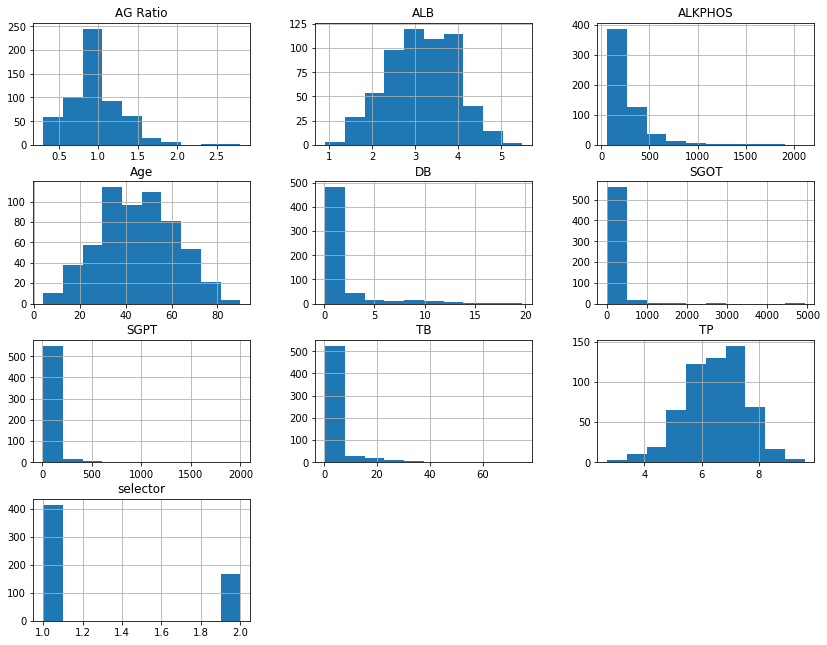

In [5]:
df.hist(figsize=(14,11))

## Compare number of samples

Text(0, 0.5, 'Number of sample')

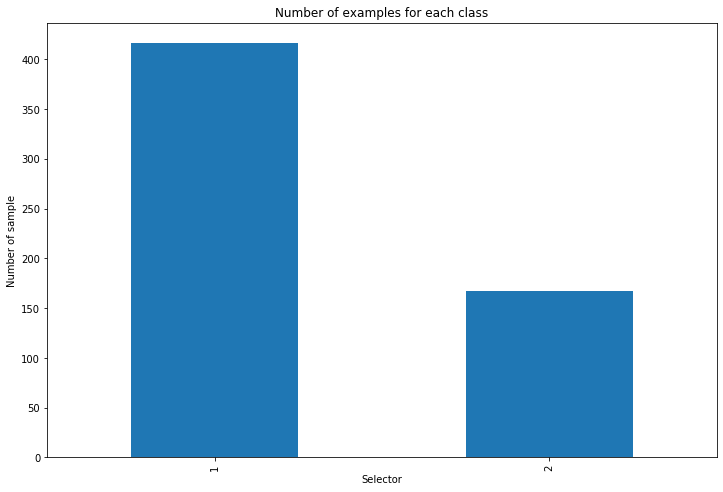

In [6]:
# show number of examples in each class
numb_of_classes = pd.value_counts(df['selector'], sort = True).sort_index()
numb_of_classes.plot(kind = 'bar')
plt.title("Number of examples for each class")
plt.xlabel("Selector")
plt.ylabel("Number of sample")

Text(0, 0.5, 'Number of samples')

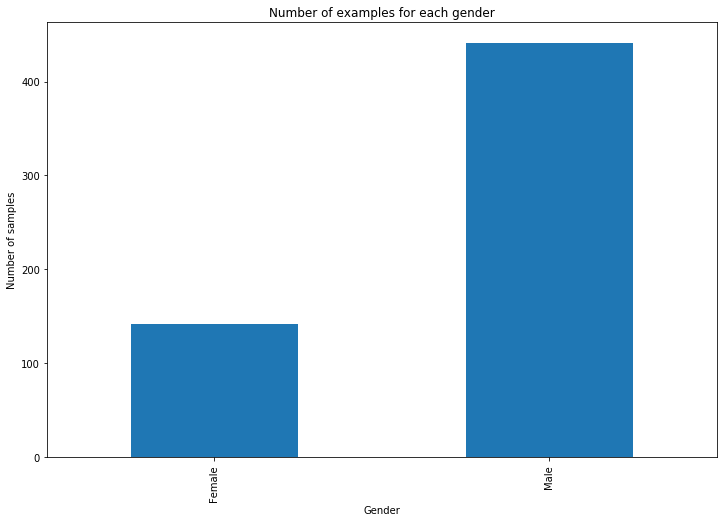

In [7]:
# show number of examples of each gender
numb_of_classes = pd.value_counts(df['Gender'], sort = True).sort_index()
numb_of_classes.plot(kind = 'bar')
plt.title("Number of examples for each gender")
plt.xlabel("Gender")
plt.ylabel("Number of samples")

## Compare mean features of each category

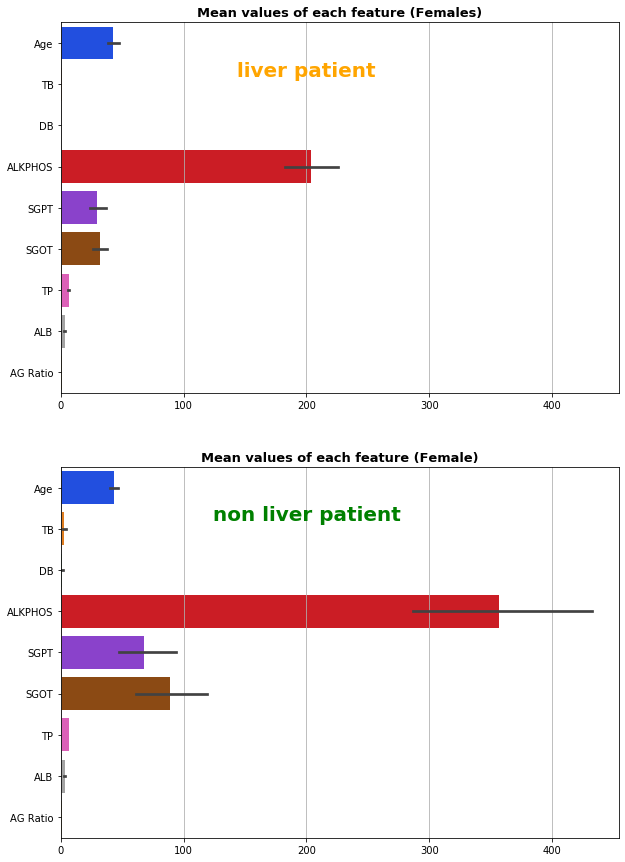

In [8]:
data1 = df[df['selector'] == 2] # no disease
data1 = data1[data1['Gender'] == 'Female']
data1 = data1.iloc[:,:-1]

data2 = df[df['selector'] == 1] # disease
data2 = data2[data2['Gender'] == 'Female']
data2 = data2.iloc[:,:-1]

fig = plt.figure(figsize=(10,15))

# people without disease
ax1 = fig.add_subplot(211)
ax1.grid()
ax1.set_title('Mean values of each feature (Females)',fontsize=13, weight='bold')
ax1.text(200,0.8,'liver patient',fontsize=20,horizontalalignment='center', color='orange', weight='bold')

plt.sca(ax1)

# people with disease
ax2 = fig.add_subplot(212,sharex=ax1)
ax2.grid()
ax2.set_title('Mean values of each feature (Female)',fontsize=13,weight='bold')
ax2.text(200,0.8,'non liver patient',fontsize=20,horizontalalignment='center',color='green',weight='bold')

plt.sca(ax2)

# show plots
sns.barplot(data=data1,ax=ax1,orient='horizontal', palette='bright')
sns.barplot(data=data2,ax=ax2,orient='horizontal', palette='bright')

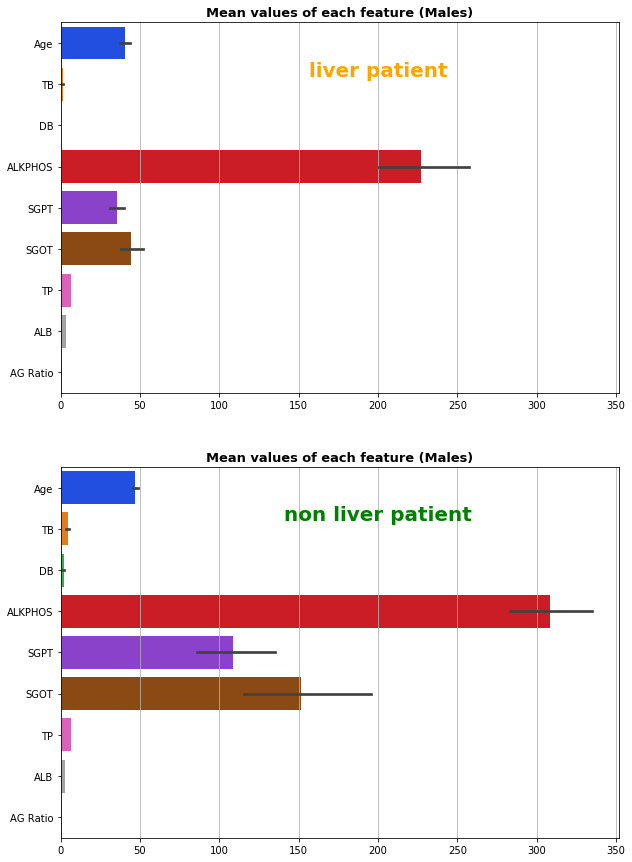

In [9]:
data1 = df[df['selector'] == 2] # no disease
data1 = data1[data1['Gender'] == 'Male']
data1 = data1.iloc[:,:-1]

data2 = df[df['selector'] == 1] # disease
data2 = data2[data2['Gender'] == 'Male']
data2 = data2.iloc[:,:-1]

fig = plt.figure(figsize=(10,15))

# people without disease
ax1 = fig.add_subplot(211)
ax1.grid()
ax1.set_title('Mean values of each feature (Males)',fontsize=13, weight='bold')
ax1.text(200,0.8,'liver patient',fontsize=20,horizontalalignment='center', color='orange', weight='bold')

plt.sca(ax1)

# people with disease
ax2 = fig.add_subplot(212,sharex=ax1)
ax2.grid()
ax2.set_title('Mean values of each feature (Males)',fontsize=13,weight='bold')
ax2.text(200,0.8,'non liver patient',fontsize=20,horizontalalignment='center',color='green',weight='bold')

plt.sca(ax2)

# show plots
sns.barplot(data=data1,ax=ax1,orient='horizontal', palette='bright')
sns.barplot(data=data2,ax=ax2,orient='horizontal', palette='bright')

As we can see above mean values of ALKPHOS, SGPT and SGOT tend to be much lower in liver patients than in non liver patients.

# Preprocessing

## change non-numerical values to integers

In [10]:
# transform Gender to numerical values
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
df.loc[:,'Gender'] = le.transform(df['Gender'])

In [11]:
# transform selector from 1-2 to 0-1
df['selector'] = df['selector'].map({2:0, 1:1})

# display the result
df.head()

,Age,Gender,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## remove empty values

In [12]:
# we can see that there are some null values in AG Ratio
df = df.dropna(how = 'any', axis = 0)

# check now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       579 non-null    int64  
 1   Gender    579 non-null    int64  
 2   TB        579 non-null    float64
 3   DB        579 non-null    float64
 4   ALKPHOS   579 non-null    int64  
 5   SGPT      579 non-null    int64  
 6   SGOT      579 non-null    int64  
 7   TP        579 non-null    float64
 8   ALB       579 non-null    float64
 9   AG Ratio  579 non-null    float64
 10  selector  579 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 54.3 KB


## split data into features & classes

In [13]:
# split data into feture set X and labels y
y = df['selector']
X = df.drop('selector', axis=1)

# show first five cols of feature set
X.head()

,Age,Gender,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


## feature selection

In [14]:
selected_X = SelectKBest(chi2, k=5).fit(X, y)
selected_X_df = pd.DataFrame({'Feature': list(X.columns),
                                    'Scores': selected_X.scores_})
selected_X_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
6,SGOT,10138.860197
5,SGPT,6361.141943
4,ALKPHOS,3956.690967
2,TB,327.913058
3,DB,186.119776
0,Age,60.226677
8,ALB,2.966936
9,AG Ratio,1.658882
1,Gender,0.926483
7,TP,0.118535


## display heatmap

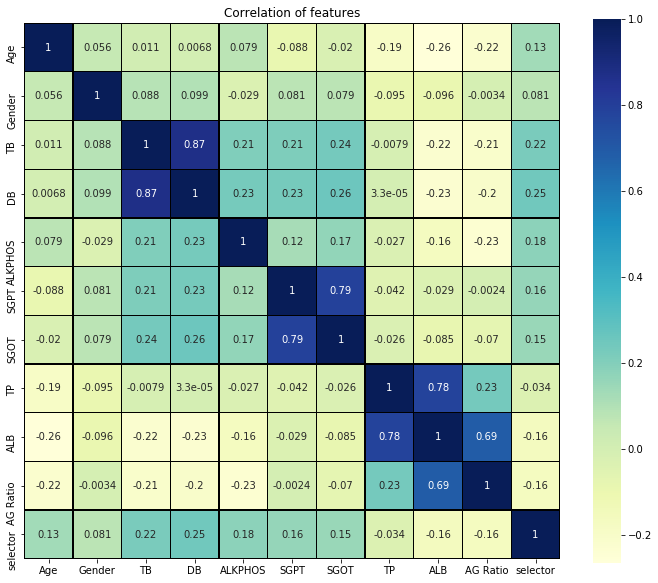

In [15]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Correlation of features')

# Draw the heatmap using seaborn
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

As we can see above:
- DB & TB
- SGOT & SGPT
- ALB & TP
- ALB & AG Ratio

are highly correlated. Now we need to make a feature ranking to decide what features we want to use in classification.

We can see that nothing correlates directly with selector - the highest correlation we can achieve with DB, but it's still only 0.25, but it's not a solid conclusion, because variables are biased (ex. most of people here are Males).

# Training & testing

In [16]:
def train_and_test(X, y, layer_size, solver, momentum=0.0):
    classifier = MLPClassifier(hidden_layer_sizes=(layer_size, ), solver=solver, momentum=momentum, max_iter=10000)
    cross_validator = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=7890)
    scores = []

    for train_index, test_index in cross_validator.split(X, y):
        # create training & testing set
        X_train, X_test = X[train_index, : ], X[test_index, : ]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # scale data
        scaler = MinMaxScaler()

        # fit to training data only & transform both
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # fit & predict & calculate the score
        classifier.fit(X_train, y_train)
        predict = classifier.predict(X_test)
        acc_score = accuracy_score(y_test, predict)
        scores.append(acc_score)

    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print("Accuracy score: %.3f (%.3f)" % (mean_score, std_score))
    return mean_score, std_score

In [18]:
min_features = 1
max_features = 5

layers = [5, 10, 15, 100, 150]
momentum_values = [0.0, 0.1, 0.5, 0.9]

filename = 'results.csv'

with open(filename, 'w', newline='') as csvfile:
    fieldnames = ['features', 'layers', 'momentum', 'mean_score', 'std_score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for k in range(min_features, max_features): 
        X_best = SelectKBest(chi2, k=k).fit_transform(X, y)

        for size in layers:
            for momentum in momentum_values:
                print("____features: {}, layers: {}, momentum: {}____".format(k, size, momentum))
                mean_score, std_score = train_and_test(X_best, y, size, 'sgd', momentum)
                writer.writerow({'features': k, 'layers': size, 'momentum': momentum, 'mean_score': mean_score, 'std_score': std_score})
        print("")

____features: 1, layers: 5, momentum: 0.0____
Accuracy score: 0.714 (0.002)
____features: 1, layers: 5, momentum: 0.1____
Accuracy score: 0.712 (0.009)
____features: 1, layers: 5, momentum: 0.5____
Accuracy score: 0.714 (0.002)
____features: 1, layers: 5, momentum: 0.9____
Accuracy score: 0.715 (0.002)
____features: 1, layers: 10, momentum: 0.0____
Accuracy score: 0.714 (0.003)
____features: 1, layers: 10, momentum: 0.1____
Accuracy score: 0.713 (0.004)
____features: 1, layers: 10, momentum: 0.5____
Accuracy score: 0.715 (0.001)
____features: 1, layers: 10, momentum: 0.9____
Accuracy score: 0.715 (0.001)
____features: 1, layers: 15, momentum: 0.0____
Accuracy score: 0.714 (0.003)
____features: 1, layers: 15, momentum: 0.1____
Accuracy score: 0.715 (0.001)
____features: 1, layers: 15, momentum: 0.5____
Accuracy score: 0.715 (0.001)
____features: 1, layers: 15, momentum: 0.9____
Accuracy score: 0.715 (0.002)
____features: 1, layers: 100, momentum: 0.0____
Accuracy score: 0.715 (0.001)
__